In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import numpy as np
import pandas as pd
import networkx as nx

from vertica_python import connect
import pyodbc 

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [2]:
conn_info = {'host': '10.10.4.101',
             'port': 5433,
             'user': 'user_website',
             'password': 'Bytn>pth',
             'database': 'DWH'}
connection = connect(**conn_info)

df = pd.read_sql_query("select Shipper, Shipper_Short_Name, Shipper_INN, Shipper_KPP, Consignee, Consignee_Short_Name, Consignee_INN, Consignee_KPP, StateAlias, count(distinct wbid) as qnt_doc, sum(Volume_dal) as vol_dal\
                        from data_showcase.WayBill\
                        inner join nsi.LicenseReestr L on L.inn_org = Consignee_INN and L.kpp_unit=Consignee_KPP\
                        where Shipper_INN <> Consignee_INN and BigGroup not in (799, 800) and isUnpacked = 'false' and ProductType_Code = 200 and Date > '20170101'and Type = 'WBInvoiceFromMe'\
                        group by Shipper, Shipper_Short_Name, Shipper_INN, Shipper_KPP, Consignee, Consignee_Short_Name, Consignee_INN, Consignee_KPP, StateAlias", connection)
connection.close()
print(df.shape)
df.head()

(68764, 11)


,Shipper,Shipper_Short_Name,Shipper_INN,Shipper_KPP,Consignee,Consignee_Short_Name,Consignee_INN,Consignee_KPP,StateAlias,qnt_doc,vol_dal
0,010040670572,"ООО ""Салют""",1511019910,151101001,030000332275,"ООО ""Абсолют 2000""",4026003395,402945004,Receipted,2,788.000
1,010060697672,"ООО ""Логистик Эл-Си""",7728293620,775145001,030000403764,"ООО ""МЕТРО Кэш энд Керри""",7704218694,550143002,Receipted,113,2796.200
2,010000006557,"ООО ""КАМПАРИ РУС""",7723560448,503245001,010000006092,"ООО ""МЕТРО Кэш энд Керри""",7704218694,540503001,Receipted,1,51.600
3,010000007038,"ООО ""Ритейл Логистик""",5040114204,504001001,010029135098,"ООО ""АТАК""",7743543232,504545001,Receipted,139,38923.800
4,020000642267,Домодедовское РАЙПО,5009002690,500945010,030000235444,"ООО ""РЕГИОН 50""",5029200812,502945001,Revoked,1,39.725


In [3]:
# del D
D = nx.DiGraph()

In [975]:
df[df['Consignee_Short_Name']=='Демянское райпо'][:5]

,Shipper,Shipper_Short_Name,Shipper_INN,Shipper_KPP,Consignee,Consignee_Short_Name,Consignee_INN,Consignee_KPP,StateAlias,qnt_doc,vol_dal
1694,010060693073,"ООО ""ЛУДИНГ-СПб""",7810027596,782045002,020000707536,Демянское райпо,5304000185,530432011,Receipted,7,10.980
24843,010060693073,"ООО ""ЛУДИНГ-СПб""",7810027596,782045002,020000707641,Демянское райпо,5304000185,530432006,Receipted,5,6.170
42590,010060693073,"ООО ""ЛУДИНГ-СПб""",7810027596,782045002,020000707656,Демянское райпо,5304000185,530432030,Receipted,8,31.550
84473,010060693073,"ООО ""ЛУДИНГ-СПб""",7810027596,782045002,020000707661,Демянское райпо,5304000185,530432010,Receipted,18,124.970
94182,030000469837,"ООО ""Алкон Д""",5321194029,532101001,020000707530,Демянское райпо,5304000185,530432029,Receipted,4,13.375


In [412]:
[x for x in D]
# df[df['Consignee_Short_Name']=='Демянское райпо'].drop_duplicates(subset=['Shipper', 'Consignee'])

['ООО "ЛУДИНГ-СПб"',
 '020000707536',
 '020000707641',
 '020000707656',
 '020000707661',
 'ООО "Алкон Д"',
 '020000707530',
 '020000707678',
 '020000707679',
 '020000707648',
 '020000707532',
 '020000707502',
 'ООО "ТК-РУСАЛ"',
 '020000707675',
 '020000707639',
 '020000707651',
 '020000067432',
 '020000707721',
 '020000707659',
 '020000067214',
 '020000707542',
 '020000707539',
 '020000707642',
 '020000707511']

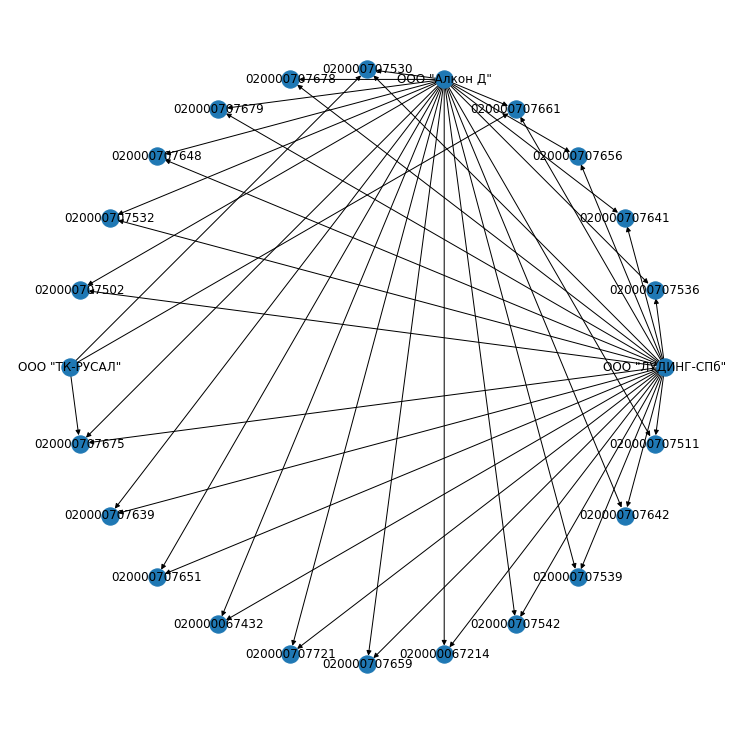

In [656]:
del D
D = nx.DiGraph()

for i in df[df['Consignee_Short_Name']=='Демянское райпо'].drop_duplicates(subset=['Shipper', 'Consignee']).iterrows():
    D.add_node([*i][1][1])
    D.add_node([*i][1][4])
        
#     print([*i][1][0])

for i in df[df['Consignee_Short_Name']=='Демянское райпо'].iterrows():
     D.add_edge([*i][1][1], [*i][1][4])                                                                          


pos = nx.circular_layout(D)
plt.figure(figsize=(10,10))
nx.draw(D, pos, with_labels=True)                                                                           

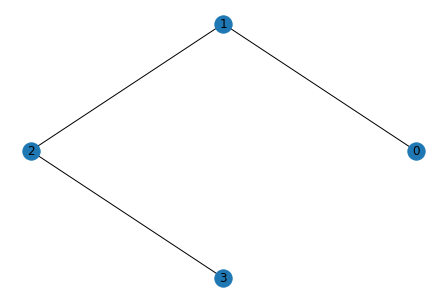

In [663]:
G=nx.path_graph(4)
pos=nx.shell_layout(G)
nx.draw(G, pos, with_labels=True) 

In [468]:
[*i][1][0]

'010060688263'

In [469]:
# [*i][1][0]
D.nodes[[*i][1][0]]["Name"]

[]

In [490]:
[*i][1]['Shipper_Short_Name']

'ООО "Логистика"'

In [484]:
[*i][1][0]

'030000498318'

In [483]:
D.nodes[[*i][1][0]]

{'Name': 'ООО "Логистика"', 'INN': '0326565528'}

In [464]:
df.drop_duplicates(subset=['Shipper', 'Consignee'])

,Shipper,Shipper_Short_Name,Shipper_INN,Shipper_KPP,Consignee,Consignee_Short_Name,Consignee_INN,Consignee_KPP,StateAlias,qnt_doc,vol_dal
0,010060688263,"ООО ""Алкогольная Региональная Компания""",6330057856,631345002,020000649584,"ООО ""Восемнадцать плюс""",6311145497,637745005,Receipted,38,101.3000
1,030000282589,"ООО ""АЛКОТОРГ""",1659091192,163345004,020000852950,ЭНОТЕКА С,1655232011,165545003,Receipted,8,12.0450
2,010060698583,"ООО ТПП ""ЮЖНАЯ СТОЛИЦА""",2312236012,231145001,020000067029,"ООО ""АЛВАС""",2320137600,232001001,Receipted,28,22.9650
3,010060693281,"ООО ""Кубаньалкоопт""",2312242432,231245001,020000657060,"ООО ""Ветераны МВД""",2311054429,231132001,Receipted,39,54.5050
4,010060695162,"ООО ""ЦентрАлко""",9723009121,772345001,030000383500,"ООО ""Эталон""",5024181179,502445001,Receipted,15,66.4900
...,...,...,...,...,...,...,...,...,...,...,...
705227,010000005524,"ООО ""НИКА""",5903048764,598145001,020000641778,ООО ЛиС,5933271640,593345015,Receipted,11,35.1800
705229,010060689238,"ООО ""Агроторг""",7825706086,775145010,020000407333,"ООО ""Агроаспект""",7715277300,503032001,Receipted,88,1570.3700
705230,010060694159,"ООО ""Калитка""",6321399677,632145001,030000523846,"ООО Торговый Дом ""Озон""",6345014541,632445004,Receipted,1,1.5375
705233,010000004885,"ООО ""Альтаир""",3327852224,332745001,020000714414,"ПО ""Райпо""",3317003912,331745014,Receipted,20,60.3000


In [492]:
i

(0, Shipper                                            010060688263
 Shipper_Short_Name      ООО "Алкогольная Региональная Компания"
 Shipper_INN                                          6330057856
 Shipper_KPP                                           631345002
 Consignee                                          020000649584
 Consignee_Short_Name                    ООО "Восемнадцать плюс"
 Consignee_INN                                        6311145497
 Consignee_KPP                                         637745005
 StateAlias                                            Receipted
 qnt_doc                                                      38
 vol_dal                                                   101.3
 Name: 0, dtype: object)

In [4]:
# del D
D = nx.DiGraph()

Name = []
nx.set_node_attributes(D, Name, name='Name')
INN = []
nx.set_node_attributes(D, INN, name='INN')

for i in df.drop_duplicates(subset=['Shipper', 'Consignee']).iterrows():
    i = [*i][1]
    D.add_node(i['Shipper'])
    D.add_node(i['Consignee'])
    
    D.nodes[i['Shipper']]["Name"] = i['Shipper_Short_Name']
    D.nodes[i['Consignee']]["Name"] = i['Consignee_Short_Name']
    D.nodes[i['Shipper']]["INN"] = i['Shipper_INN']
    D.nodes[i['Consignee']]["INN"] = i['Consignee_INN']

        

for i in df.iterrows():
    i = [*i][1]
    D.add_edge(i['Shipper'], i['Consignee'], StateAlias = i['StateAlias'], Qnt_doc = i['qnt_doc'], vol_dal = i['vol_dal']) 

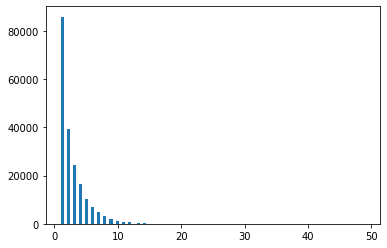

In [717]:
plt.hist([[i][0][1] for  i in D.in_degree(D.subgraph([n for n in D.nodes() if D.out_degree(n)==0]))], bins=100);

In [968]:
data = [[i][0] for  i in D.out_degree(D.subgraph([n for n in D.nodes() if D.out_degree(n)>0]))]
data.sort(key=lambda tup: tup[1], reverse=True)
data[:5]

[('010000006173', 5603),
 ('030000235444', 5421),
 ('010060688151', 5000),
 ('030000407377', 4651),
 ('010000007038', 4473)]

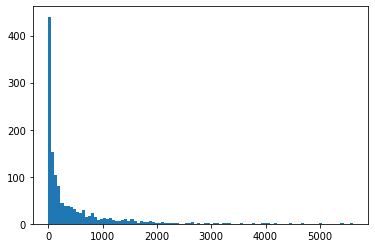

In [731]:
plt.hist([[i][0][1] for  i in D.out_degree(D.subgraph([n for n in D.nodes() if D.out_degree(n)>1]))], bins=100);

In [496]:
D.number_of_nodes()

199180

In [495]:
D.number_of_edges()

535893

In [ ]:
[D.in_degree(n), D.out_degree(n)]

In [687]:
[n for n in D.neighbors('030000498318') if D.out_degree(n)==0 and D.in_degree(n)<3]

['020000647421',
 '030000238028',
 '020000627967',
 '020001080824',
 '030000123289',
 '030000549330']

In [969]:
# [D.out_degree(n) for n in D.neighbors('030000498318')]

In [678]:
D.in_degree('030000498318')

4

In [679]:
D.out_degree('030000498318')

117

# Предыдущие

In [797]:
list(D.predecessors('030000498318'))

['010060698047', '010000000447', '010032858994', '010015204890']

# После идущие

In [970]:
# list(D.successors('030000498318'))[1:]

In [771]:
nx.contracted_nodes(D.subgraph(list(D.predecessors('030000498318'))+list(D.subgraph(D.successors('030000498318')))+['030000498318']),
                   '030000105133','020000639239')

In [971]:
# D.subgraph(list(D.predecessors('030000498318'))+list(D.subgraph(D.successors('030000498318')))+['030000498318'])

In [802]:
list(D.predecessors('030000498318'))+['030000498318']

['010060698047',
 '010000000447',
 '010032858994',
 '010015204890',
 '030000498318']

In [869]:
list(D.predecessors(main_node[0]))

['010060698047', '010000000447', '010032858994', '010015204890']

In [880]:
main_node = ['030000498318']
for i in list(D.predecessors(main_node[0])):
    main_node.extend(list(D.predecessors(i)))
main_node += list(D.predecessors(main_node[0]))
main_node

['030000498318',
 '030000317392',
 '010060688444',
 '010060695265',
 '010000006331',
 '010025902586',
 '010060699653',
 '010000000107',
 '010000000051',
 '030000437558',
 '010060699943',
 '010060701636',
 '010060700292',
 '010060695210',
 '010060687919',
 '010000007039',
 '010060696387',
 '010000005463',
 '030000448593',
 '010060696852',
 '010060695236',
 '010000212049',
 '010060701949',
 '010016055982',
 '010000000325',
 '010000006754',
 '010060693219',
 '010060697001',
 '030000419572',
 '010000006614',
 '010060698047',
 '010000000447',
 '010032858994',
 '010015204890']

In [922]:
# dict((x, D.nodes[x]['Name']) for x in D.subgraph(main_node))
# node_color = ['red'] + ['blue']*(len(main_node)-1)
# node_color


In [932]:
D.subgraph(main_node).edges()[('010025902586', '010015204890')]['vol_dal']

8723.9

In [972]:
# dict(zip(main_node , node_color))
# [D.subgraph(main_node).edges()[i]['Qnt_doc']/500 for i in D.subgraph(main_node).edges()]

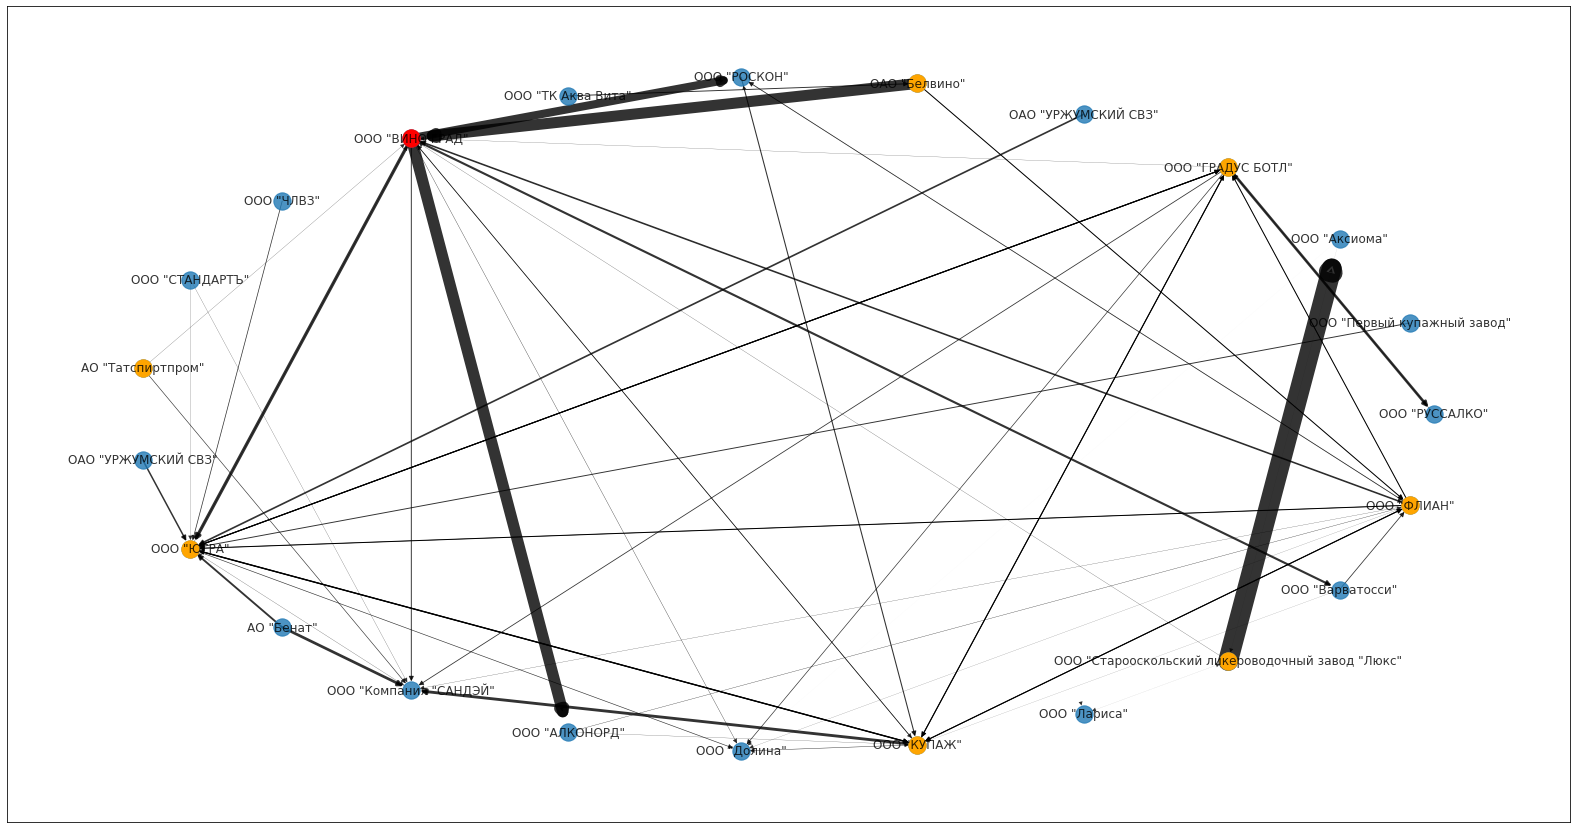

In [8]:
main_node = ['010025470582']
for i in list(D.predecessors(main_node[0])):
    main_node.extend(list(D.predecessors(i)))
main_node += list(D.predecessors(main_node[0]))

plt.figure(figsize=(28,15))
pos = nx.circular_layout(D.subgraph(main_node))
nx.draw_networkx(D.subgraph(main_node), pos, labels=dict((x, D.nodes[x]['Name']) for x in D.subgraph(main_node)),
                 width=[D.subgraph(main_node).edges()[i]['vol_dal']/10**4 for i in D.subgraph(main_node).edges()], alpha=0.8)
nx.draw_networkx(D.subgraph(main_node[0]), pos, node_color='red', with_labels=False)
nx.draw_networkx(D.subgraph(list(D.predecessors(main_node[0]))), pos, node_color='orange', with_labels=False)
# nx.draw_networkx_edges(D.subgraph(main_node), pos);

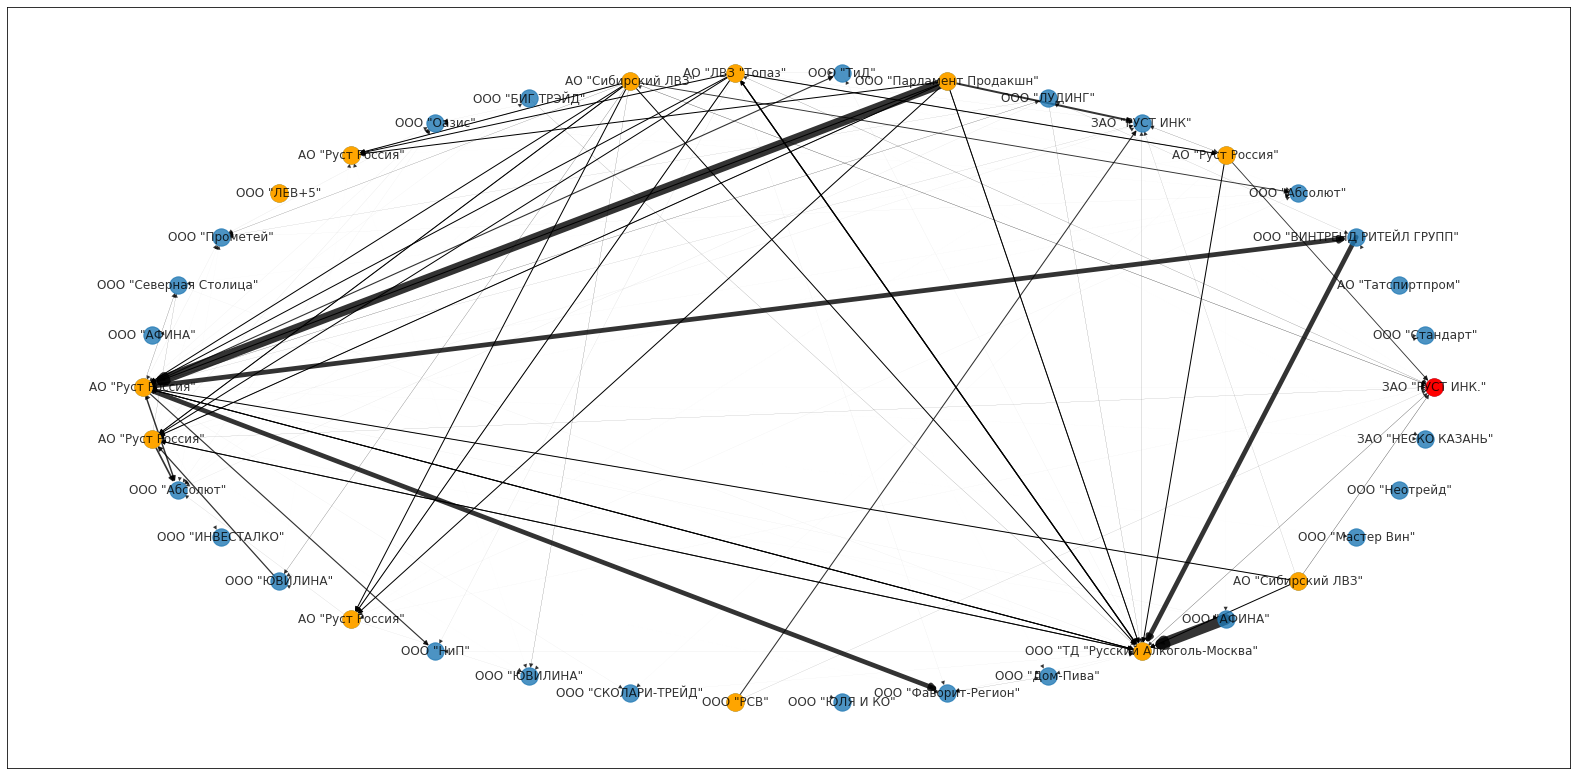

In [11]:
main_node = ['010000006830']
for i in list(D.predecessors(main_node[0])):
    main_node.extend(list(D.predecessors(i)))
main_node += list(D.predecessors(main_node[0]))

plt.figure(figsize=(28,14))
pos = nx.circular_layout(D.subgraph(main_node))
nx.draw_networkx(D.subgraph(main_node), pos, labels=dict((x, D.nodes[x]['Name']) for x in D.subgraph(main_node)),
                 width=[D.subgraph(main_node).edges()[i]['vol_dal']/10**6 for i in D.subgraph(main_node).edges()], alpha=0.8)
nx.draw_networkx(D.subgraph(main_node[0]), pos, node_color='red', with_labels=False)
nx.draw_networkx(D.subgraph(list(D.predecessors(main_node[0]))), pos, node_color='orange', with_labels=False)

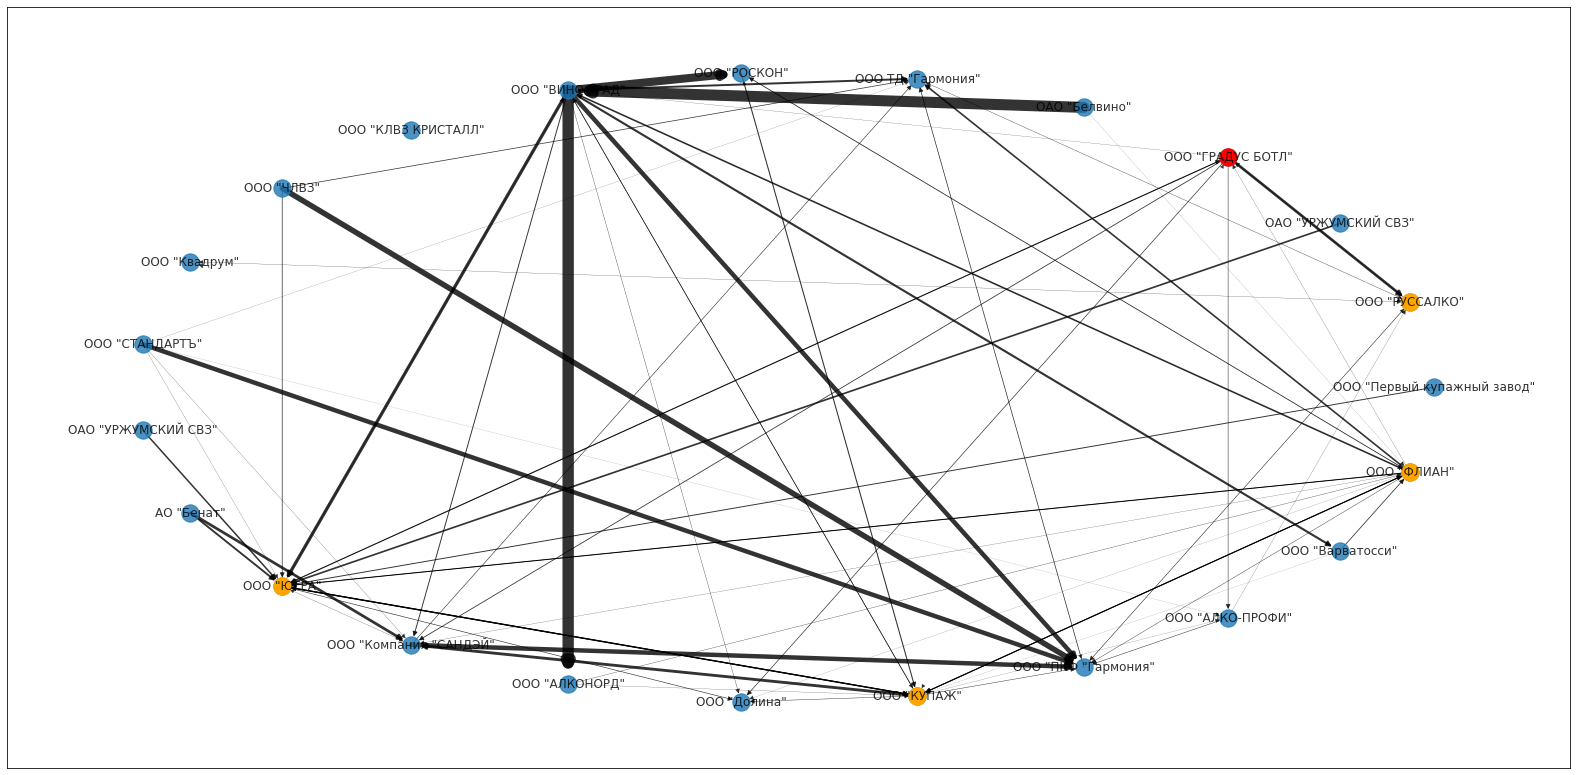

In [16]:

main_node = ['030000460797']
for i in list(D.predecessors(main_node[0])):
    main_node.extend(list(D.predecessors(i)))
main_node += list(D.predecessors(main_node[0]))

plt.figure(figsize=(28,14))
pos = nx.circular_layout(D.subgraph(main_node))
nx.draw_networkx(D.subgraph(main_node), pos, labels=dict((x, D.nodes[x]['Name']) for x in D.subgraph(main_node)),
                 width=[D.subgraph(main_node).edges()[i]['vol_dal']/10**4 for i in D.subgraph(main_node).edges()], alpha=0.8)
nx.draw_networkx(D.subgraph(main_node[0]), pos, node_color='red', with_labels=False)
nx.draw_networkx(D.subgraph(list(D.predecessors(main_node[0]))), pos, node_color='orange', with_labels=False)

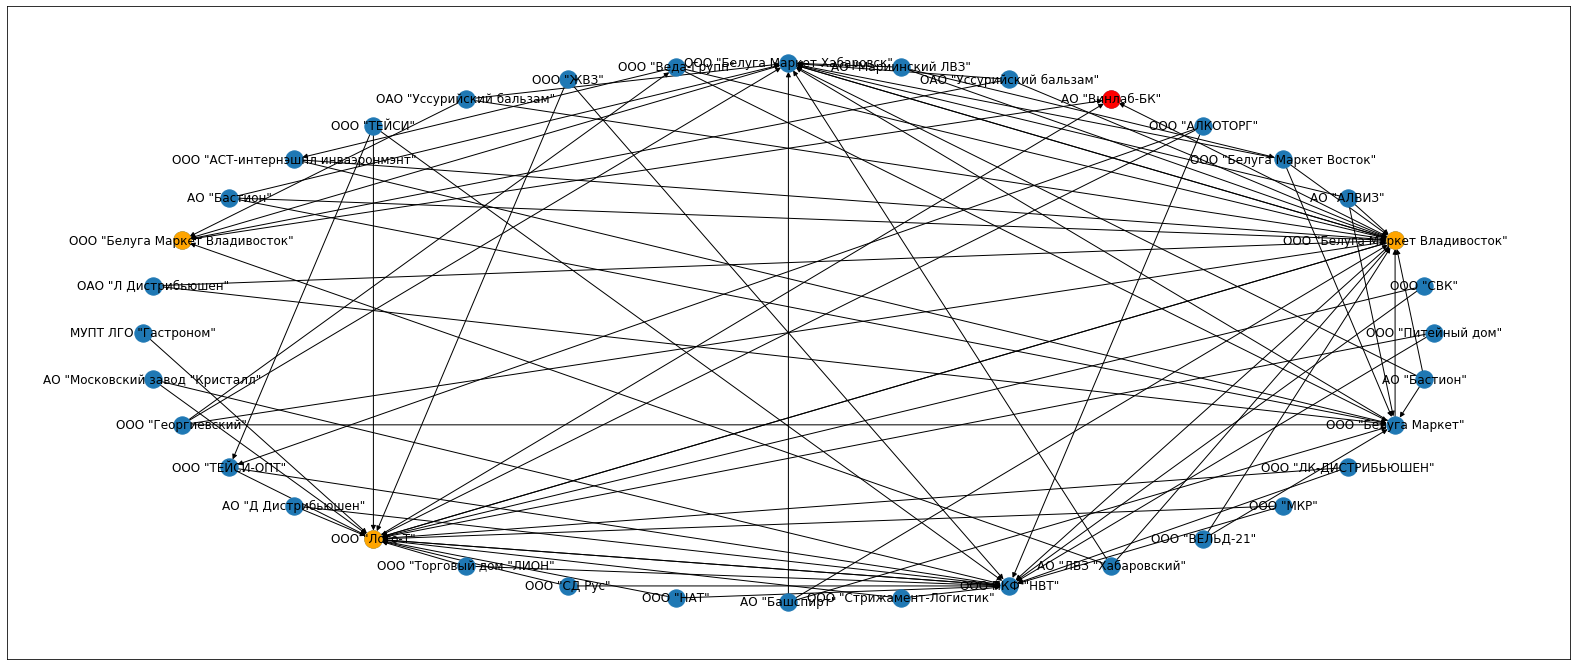

In [966]:
main_node = ['030000361888']
for i in list(D.predecessors(main_node[0])):
    main_node.extend(list(D.predecessors(i)))
main_node += list(D.predecessors(main_node[0]))

plt.figure(figsize=(28,12))
pos = nx.circular_layout(D.subgraph(main_node))
nx.draw_networkx(D.subgraph(main_node), pos, labels=dict((x, D.nodes[x]['Name']) for x in D.subgraph(main_node)),
                )
nx.draw_networkx(D.subgraph(main_node[0]), pos, node_color='red', with_labels=False)
nx.draw_networkx(D.subgraph(list(D.predecessors(main_node[0]))), pos, node_color='orange', with_labels=False)

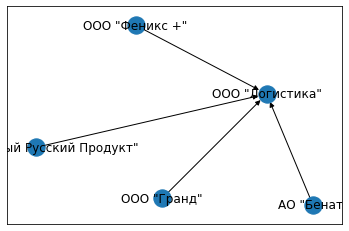

In [862]:
sub_list = list(D.predecessors('030000498318'))+['030000498318']
nx.draw_networkx(D.subgraph(sub_list), labels = dict((x, D.nodes[x]['Name']) for x in D.subgraph(sub_list)))
# nx.draw_networkx(D.subgraph(D.successors('030000498318')))
# nx.draw_networkx(D.subgraph('030000498318'))

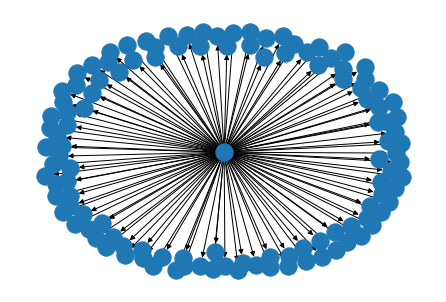

In [648]:
nx.draw(D.subgraph([n for n in D.neighbors('030000498318')]+['030000498318']))

In [629]:
D.edges['010025902586', '010060688263']

{'StateAlias': 'Receipted', 'Qnt_doc': 23, 'vol_dal': 21258.85}

# Достигаемые

In [774]:
len(nx.ancestors(D, '030000498318'))

1260

# Достижимые

In [634]:
len(nx.descendants(D, '010025902586'))

193348

In [541]:
G = nx.DiGraph()
H = nx.path_graph(4)


G.add_nodes_from(H)
# G.add_edge(0,1)
G.add_edges_from([(1, 2), (1, 3), (1,0), (0,3)])

G.out_degree()

OutDegreeView({0: 1, 1: 3, 2: 0, 3: 0})

In [543]:
G.degree()

DiDegreeView({0: 2, 1: 3, 2: 1, 3: 2})

In [558]:
[[*i] for i in G.degree()] #[i for i in G.out_degree()]

[[0, 2], [1, 3], [2, 1], [3, 2]]

In [561]:
[[*i] for i in G.out_degree()]

[[0, 1], [1, 3], [2, 0], [3, 0]]

In [564]:
G.nodes()

NodeView((0, 1, 2, 3))

In [572]:
np.hstack([[[*i] for i in G.degree()], [[*i] for i in G.out_degree()]])

array([[0, 2, 0, 1],
       [1, 3, 1, 3],
       [2, 1, 2, 0],
       [3, 2, 3, 0]])

In [579]:
[i for i in zip([[[*i][1] for i in G.degree()], [[*i][1] for i in G.out_degree()]])]

[([2, 3, 1, 2],), ([1, 3, 0, 0],)]

In [575]:
[[*i][1] for i in G.degree()]  [[*i][1] for i in G.out_degree()]

[2, 3, 1, 2, 1, 3, 0, 0]

In [584]:
[x-y for x, y in list(zip([[*i][1] for i in G.degree()], [[*i][1] for i in G.out_degree()]))]

[1, 0, 1, 2]

In [588]:
 G.in_degree()[3]

2

In [569]:
for i in G.degree():
    
    print([*i])

[0, 2]
[1, 3]
[2, 1]
[3, 2]


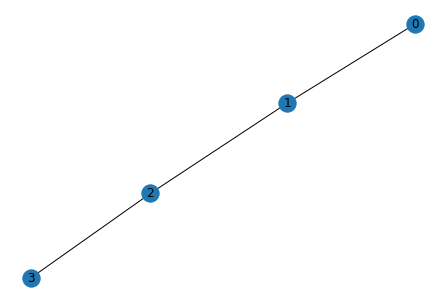

In [694]:
nx.draw(G, with_labels=True)

In [688]:
import networkx as nx
G = nx.path_graph(4)
M = nx.contracted_nodes(G, 1, 2)
P3 = nx.path_graph(3)
nx.is_isomorphic(M, P3)

False

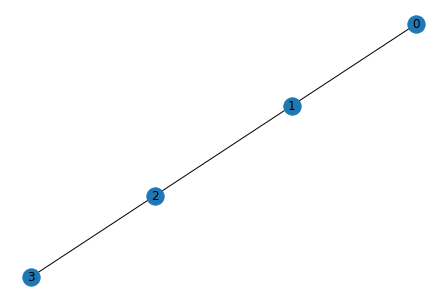

In [695]:
nx.draw(G, with_labels=True)

In [696]:
nx.closeness_centrality(G)

{0: 0.5, 1: 0.75, 2: 0.75, 3: 0.5}

In [697]:
nx.degree_centrality(G)

{0: 0.3333333333333333,
 1: 0.6666666666666666,
 2: 0.6666666666666666,
 3: 0.3333333333333333}

In [690]:
for i in G.nodes():
    if i %2 ==0:
        G.node[i]['attr'] = 'chet'
    else:
        G.node[i]['attr'] = 'NEchet' 

In [691]:
G.nodes[1]

{'attr': 'NEchet'}

In [692]:
sub = []
for i in G.nodes():
    print(G.nodes[i]['attr'])
    if G.nodes[i]['attr'] == 'NEchet':
        sub.append(i)
        
sub

chet
NEchet
chet
NEchet


[1, 3]

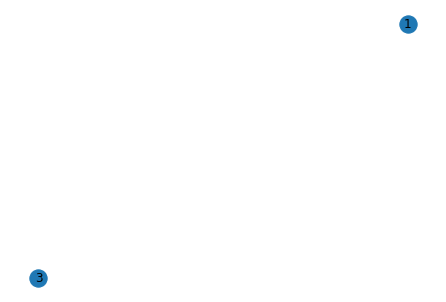

In [693]:
nx.draw(G.subgraph(sub), with_labels=True)

In [781]:
nx.multipartite_layout(G, subset_key="layer")

AttributeError: module 'networkx' has no attribute 'graphviz_layout'

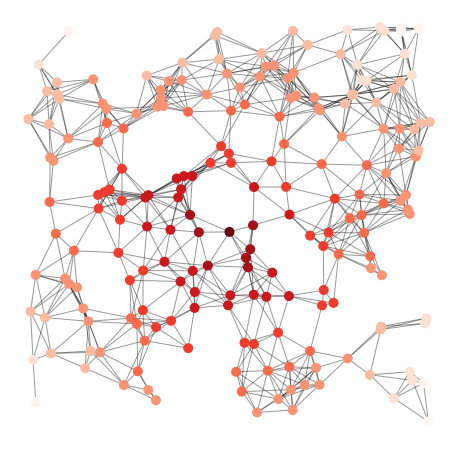

In [241]:
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

In [188]:

conn_info = {'host': '10.10.4.101',
             'port': 5433,
             'user': 'user_website',
             'password': 'Bytn>pth',
             'database': 'DWH'}
connection = connect(**conn_info)

res = pd.read_sql_query("select * from python.python_script_result", connection)
connection.close()
print(res.shape)
res.head()

(1952, 7)


,Owner_Id,life_time,black_flag,probably_yes,clf_LR,clf_RR,clf_CV
0,010000000203,1304,0,0.073312,0.006224,0.073312,4.612977e-04
1,010000000507,363,0,0.876736,0.876736,0.204925,1.668013e-01
2,010000000580,1351,0,0.000074,0.000074,0.000000,6.234145e-07
3,010060688153,168,0,0.913734,0.913734,0.202821,4.392432e-01
4,020000009026,1319,0,0.035009,0.035009,0.027565,1.524611e-03


In [195]:
df = df.merge(res.rename(columns={'Owner_Id': 'Shipper'})[['Shipper','life_time','black_flag','probably_yes']], on='Shipper')

In [247]:
df.shape

(167131, 6)

In [245]:
D.number_of_nodes()

104969

In [246]:
D.number_of_edges()

167131

In [256]:
gen = nx.shortest_paths.all_shortest_paths(D, source = '030000039118', target = '030000219559')
for i in gen:
    print(i)

['030000039118', '030000219559']


In [264]:
number_max = 10

bc = nx.degree_centrality(D)
sorted_degree_cent = sorted(bc, key = bc.get, reverse=True)
for i in sorted_degree_cent[:number_max]:
    print('Node: ', i)
    print(f'Degree centrality: {bc[i]:2f}')

Node:  030000000026
Degree centrality: 0.060361
Node:  030000039124
Degree centrality: 0.040431
Node:  030000039153
Degree centrality: 0.039822
Node:  030000049148
Degree centrality: 0.027570
Node:  010000000580
Degree centrality: 0.025970
Node:  030000022261
Degree centrality: 0.025798
Node:  030000009686
Degree centrality: 0.023445
Node:  030000000018
Degree centrality: 0.021473
Node:  030000011772
Degree centrality: 0.020273
Node:  030000000014
Degree centrality: 0.017910


In [206]:
# df[['qnt', 'probably_yes']].sort_values(by='probably_yes').plot(secondary_y = 'probably_yes', alpha=0.5);
df.head()

,Shipper,Consignee,qnt,life_time,black_flag,probably_yes
0,030000039118,030000023014,473,1354,0,0.000069
1,030000039118,030000335116,84,1354,0,0.000069
2,030000039118,030000219559,330,1354,0,0.000069
3,030000039118,020000138574,189,1354,0,0.000069
4,030000039118,030000404746,1,1354,0,0.000069


In [265]:
df.groupby('Shipper')['Consignee'].count().sort_values(ascending=False)/df.groupby('Shipper')['Consignee'].count().sort_values(ascending=False).sum()

Shipper
030000000026    0.037910
030000039124    0.025393
030000039153    0.025004
030000049148    0.017304
010000000580    0.016293
                  ...   
030000225253    0.000006
030000492046    0.000006
030000232613    0.000006
030000238259    0.000006
030000564523    0.000006
Name: Consignee, Length: 1931, dtype: float64

In [213]:
count_cons = res.rename(columns={'Owner_Id': 'Shipper'})[['Shipper','life_time','black_flag','probably_yes']].set_index('Shipper').join(df.groupby('Shipper')['Consignee'].count())

count_cons

,life_time,black_flag,probably_yes,Consignee
Shipper,,,,
010000000203,1304,0,0.073312,606.0
010000000507,363,0,0.876736,204.0
010000000580,1351,0,0.000074,2723.0
010060688153,168,0,0.913734,12.0
020000009026,1319,0,0.035009,39.0
...,...,...,...,...
030000537943,93,0,0.271090,1.0
030000538655,46,0,0.062143,1.0
030000540629,65,0,0.086638,9.0


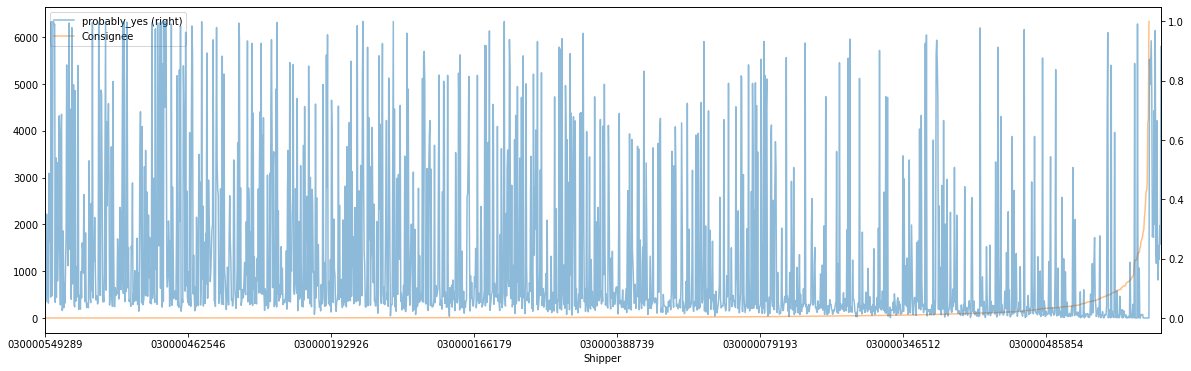

In [217]:
count_cons[['probably_yes','Consignee']].sort_values(by='Consignee').plot(secondary_y = 'probably_yes', alpha=0.5, figsize=(20,6))

In [221]:
count_cons[['probably_yes','Consignee']].corr()

,probably_yes,Consignee
probably_yes,1.000000,-0.127062
Consignee,-0.127062,1.000000


In [127]:
import networkx as nx

In [278]:
df.head()

,Shipper,Consignee,qnt,life_time,black_flag,probably_yes
0,030000039118,030000023014,473,1354,0,0.000069
1,030000039118,030000335116,84,1354,0,0.000069
2,030000039118,030000219559,330,1354,0,0.000069
3,030000039118,020000138574,189,1354,0,0.000069
4,030000039118,030000404746,1,1354,0,0.000069


In [279]:
el = [tuple(i) for i in df[['Shipper','Consignee','qnt']].values]
D = nx.DiGraph()
D.add_weighted_edges_from(el)

In [280]:
for i in enumerate(D.nodes):
    D.nodes[i[1]]['risk'] = df.probably_yes[i[0]]


In [283]:
nx.get_node_attributes(D, 'risk')['030000039118']

6.8729145947178e-05

In [286]:
ncenter

175

In [973]:
# own = '010000004600'
# el = [tuple(i) for i in df[(df['Shipper']==own) | (df['Consignee']==own)].values]
# el

In [140]:
len(el)

886

In [141]:
D = nx.DiGraph()
D.add_weighted_edges_from(el)

/home/declar/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/declar/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


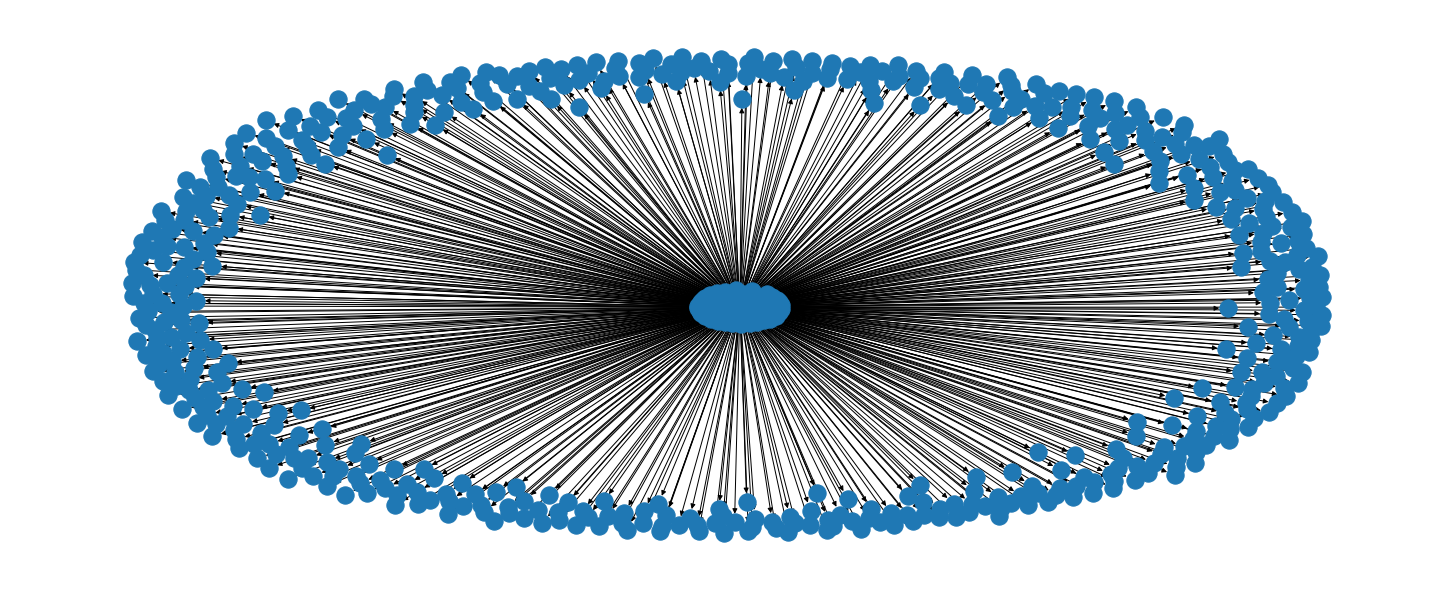

In [131]:
# plt.figure(figsize=(20,8))
# nx.draw(D)

In [185]:
pd.DataFrame(np.vstack((list(nx.degree_centrality(D).keys()), list(nx.degree_centrality(D).values()))).T, columns=['node', 'degree'])

,node,degree
0,010000004600,1.1006211180124224
1,020000671185,0.0012422360248447205
2,020000630437,0.002484472049689441
3,030000302211,0.002484472049689441
4,030000086999,0.0012422360248447205
...,...,...
801,020000633041,0.0012422360248447205
802,030000499922,0.0012422360248447205
803,010037748007,0.0012422360248447205
804,030000310385,0.0012422360248447205


In [61]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


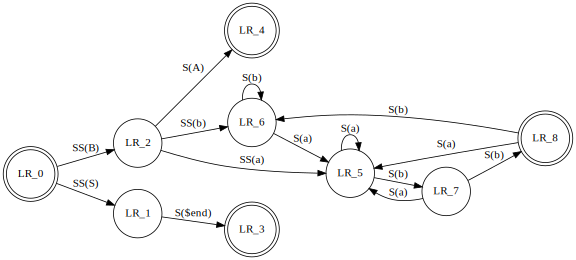

In [62]:
from graphviz import Digraph

f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f

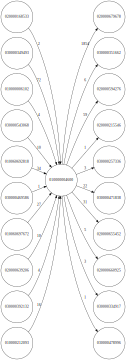

In [104]:
F = Digraph('finite_state_machine', filename='fsm.gv')
F.attr(rankdir='LR', size='8,5')

F.attr('node', shape='circle')


for i in el[80:100]:
    F.edge(i[0],i[1], label=str(i[2]))

    

F


In [114]:
conn_info = {'host': '10.10.4.101',
             'port': 5433,
             'user': 'user_website',
             'password': 'Bytn>pth',
             'database': 'DWH'}
connection = connect(**conn_info)

df = pd.read_sql_query("select Shipper_Short_Name, Consignee_Short_Name, count(distinct wbid) as qnt\
                        from data_showcase.WayBill\
                        where Shipper = '010000004600' or Consignee = '010000004600'\
                        group by Shipper_Short_Name, Consignee_Short_Name", connection)
connection.close()
print(df.shape)
df.head()

(604, 3)


,Shipper_Short_Name,Consignee_Short_Name,qnt
0,"ООО ""БАЙРОС ФМ""","ООО ""АЛКО-ПРОФИ""",16
1,"ООО ""АЛКО-ПРОФИ""","ООО ""ТРИУМФ""",26
2,"ООО ""АЛКО-ПРОФИ""","ООО ""Луи-За""",6
3,"ООО ""ТАИСА""","ООО ""АЛКО-ПРОФИ""",1
4,"ООО ""АЛКО-ПРОФИ""",ИП ЖДАМИРОВ НИКИТА ОЛЕГОВИЧ,2


In [118]:
el = [tuple(i) for i in df.values]

In [974]:
el[:5]

[('030000039118', '030000023014', 473),
 ('030000039118', '030000335116', 84),
 ('030000039118', '030000219559', 330),
 ('030000039118', '020000138574', 189),
 ('030000039118', '030000404746', 1)]

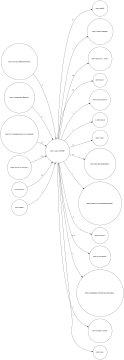

In [122]:
F = Digraph('finite_state_machine', filename='fsm1.gv')
F.attr(rankdir='LR', size='8,5')

F.attr('node', shape='circle')


for i in el[80:100]:
    F.edge(i[0],i[1], label=str(i[2]))

    

F